<center><img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png">
<h1>Universidad Sergio Arboleda</h1>
<h3>Ciencias de la Computacion e IA
<h4>Machine Learning</h4>
<p><b>INTEGRANTES:</b></p>
<p>Daniel Alejandro Olarte Ávila</p>
<p>10 de Marzo 2023</p>
<p>Profesor: Camilo Rodriguez</p></center>

<h1> SE ANEXA VIDEO DE MUESTRA EN 3D VISUALMENTE CADA HIPERPLANO Y CADA GRAFICO, EN LA MISMA ENTREGA DE ESTE CUADERNO

<h3>Introducción

En este parcial se ha proporcionado un conjunto de datos sobre diabetes y otro sobre las notas de los estudiantes, con la tarea de construir modelos predictivos utilizando árboles de decisión y KNN tanto de forma manual como con herramientas como sklearn para aprendizaje automatico. En la primera parte del parcial, se realizara la validación cruzada para un árbol de decisión clasificador y para un modelo KNN de forma MANUAL, y se comparara los resultados obtenidos con los que proporciona la biblioteca sklearn. En la segunda parte, se construira modelos predictivos utilizando árboles de decisión y KNN para predecir la nota final de un estudiante utilizando variables numéricas específicas.

# PRIMER PUNTO PARCIAL

## Importacion de librerias

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import math

In [112]:
#Se extra el dataset de la pagina web
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df = df[0:30]
#Se escogen solo las columnas que se van a utilizar
X = df[['Pregnancies', 'Glucose', 'BloodPressure']]
y = df['Outcome']
#Se crea el modelo de arbol de decision
X.head()

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


In [113]:
#Se imprime los primeros targets
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [114]:
X.shape, y.shape

((30, 3), (30,))

### A) **Realizar validación cruzada de cv=3 para un árbol de decisión clasificador de max_depth=3:**

- En cada CV  encontrar un árbol de decisión de max_depth=3 utilizando entropía. Mostrar cada árbol resultante, evaluar Accuracy en train y Accuracy en validación.
En cada proceso de entrenamiento se debe mostrar la entropía para todos los posibles condicionales y cuál se escogió.(8 puntos)


#### Validacion Cruzada manual

In [115]:
#Se separan los 3 conjuntos de datos del CV
c1 = X[0:10]
c2 = X[10:20]
c3 = X[20:30]

#### Primera VC

In [116]:
#Se ordenan los X y Y del primer conjunto de datos
Xtrain1 = pd.concat([c1, c2])
Xtest1 = c3
ytrain1 = pd.concat([y[0:10], y[10:20]])
ytest1 = y[20:30]

In [117]:
Xtrain1

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
5,5,116,74
6,3,78,50
7,10,115,0
8,2,197,70
9,8,125,96


In [118]:
#Se crea un nuevo dataframe con solo la columna para ir mirando cada condicion
auxGlucose = pd.DataFrame()
auxGlucose['Glucose'] = Xtrain1.sort_values(by=['Glucose'])['Glucose']
auxGlucose['Target'] = ytrain1
auxGlucose.T

,6,1,3,15,18,17,10,19,7,5,16,9,4,12,0,14,11,2,13,8
Glucose,78,85,89,100,103,107,110,115,115,116,118,125,137,139,148,166,168,183,189,197
Target,1,0,0,1,0,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1


##### Condicional 1:

In [119]:
## <= 80 GLUCOSE

EnSI = -(1/1*math.log2(1/1))
EnNO = -((7/19*math.log2(7/19)) + (12/19*math.log2(12/19)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(1/20) + EnNO*(19/20))

ENTROPIA LADO SI:  -0.0 
ENTROPIA LADO NO:  0.9494520153879484

ENTROPIA TOTAL:
 0.901979414618551


In [120]:
## <= 87 GLUCOSE

EnSI = -((1/2*math.log2(1/2)) + (1/2*math.log2(1/2)))
EnNO = -((6/18*math.log2(6/18)) + (12/18*math.log2(12/18)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(2/20) + EnNO*(18/20))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  0.9182958340544896

ENTROPIA TOTAL:
 0.9264662506490406


In [121]:
## <= 90 GLUCOSE

EnSI = -((2/3*math.log2(2/3)) + (1/3*math.log2(1/3)))
EnNO = -((5/17*math.log2(5/17)) + (12/17*math.log2(12/17)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(3/20) + EnNO*(17/20))

ENTROPIA LADO SI:  0.9182958340544896 
ENTROPIA LADO NO:  0.8739810481273578

ENTROPIA TOTAL:
 0.8806282660164275


In [122]:
## <= 102 GLUCOSE

EnSI = -((2/4*math.log2(2/4)) + (2/4*math.log2(2/4)))
EnNO = -((5/16*math.log2(5/16)) + (11/16*math.log2(11/16)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(4/20) + EnNO*(16/20))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  0.8960382325345575

ENTROPIA TOTAL:
 0.916830586027646


In [123]:
## <= 115.5 GLUCOSE

EnSI = -((4/7*math.log2(4/7)) + (3/7*math.log2(3/7)))
EnNO = -((3/13*math.log2(3/13)) + (10/13*math.log2(10/13)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(7/20) + EnNO*(13/20))

ENTROPIA LADO SI:  0.9852281360342516 
ENTROPIA LADO NO:  0.7793498372920852

ENTROPIA TOTAL:
 0.8514072418518435


In [124]:
## <= 143 GLUCOSE

EnSI = -((7/14*math.log2(7/14)) + (7/14*math.log2(7/14)))
EnNO = -(6/6*math.log2(6/6))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(14/20) + EnNO*(6/20))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.7


In [125]:
## <= 150 GLUCOSE

EnSI = -((7/15*math.log2(7/15)) + (8/15*math.log2(7/15)))
EnNO = -(5/5*math.log2(5/5))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(15/20) + EnNO*(5/20))

ENTROPIA LADO SI:  1.0995356735509143 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.8246517551631858


<h1> ESCOGIDO: GLUCOSE <= 143

##### Condicional 2:

In [126]:
auxPregnancies = pd.DataFrame()
auxPregnancies['Pregnancies'] = Xtrain1[Xtrain1['Glucose']<= 143.5].sort_values(by=['Pregnancies'])['Pregnancies']
auxPregnancies['Target'] = ytrain1
auxPregnancies.T

,4,16,1,3,18,19,6,10,5,15,17,9,7,12
Pregnancies,0,0,1,1,1,1,3,4,5,7,7,8,10,10
Target,1,1,0,0,0,1,1,0,0,1,1,1,0,0


In [127]:
## <= 0.5 PREGNANCIES

EnSI = -((2/2*math.log2(2/2)))
EnNO = -((7/12*math.log2(7/12)) + (5/12*math.log2(5/12)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(2/14) + EnNO*(12/14))

ENTROPIA LADO SI:  -0.0 
ENTROPIA LADO NO:  0.9798687566511528

ENTROPIA TOTAL:
 0.839887505700988


In [128]:
## <= 2 PREGNANCIES 

EnSI = -((3/6*math.log2(3/6)) +(3/6*math.log2(3/6)))
EnNO = -((4/8*math.log2(4/8)) + (4/8*math.log2(4/8)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(6/14) + EnNO*(8/14))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  1.0

ENTROPIA TOTAL:
 1.0


In [129]:
## <= 3.5 PREGNANCIES

EnSI = -((3/7*math.log2(3/7)) +(4/7*math.log2(4/7)))
EnNO = -((4/7*math.log2(4/7)) + (3/7*math.log2(3/7)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(7/14) + EnNO*(7/14))

ENTROPIA LADO SI:  0.9852281360342516 
ENTROPIA LADO NO:  0.9852281360342516

ENTROPIA TOTAL:
 0.9852281360342516


In [130]:
## <= 7.5 PREGNANCIES

EnSI = -((5/11*math.log2(5/11)) +(6/11*math.log2(6/11)))
EnNO = -((2/3*math.log2(2/3)) + (1/3*math.log2(1/3)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(11/14) + EnNO*(3/14))

ENTROPIA LADO SI:  0.9940302114769565 
ENTROPIA LADO NO:  0.9182958340544896

ENTROPIA TOTAL:
 0.9778014163149993


In [131]:
## <= 8.5 PREGNANCIES

EnSI = -((5/12*math.log2(5/12)) +(7/12*math.log2(7/12)))
EnNO = -((2/2*math.log2(2/2)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(12/14) + EnNO*(2/14))

ENTROPIA LADO SI:  0.9798687566511528 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.839887505700988


<h1> ESCOGIDA: PREGNANCIES <=0.5

##### Condicion 3:

In [132]:
#Se crea un datframe con las condiciones que se van cumpliendo
auxPregnancies2 = pd.DataFrame()
auxPregnancies2['Pregnancies'] = Xtrain1[(Xtrain1['Glucose']<= 143.5) & (Xtrain1['Pregnancies']>= 0.5)].sort_values(by=['Pregnancies'])['Pregnancies']
auxPregnancies2['Target'] = ytrain1
auxPregnancies2.T

,1,3,18,19,6,10,5,15,17,9,7,12
Pregnancies,1,1,1,1,3,4,5,7,7,8,10,10
Target,0,0,0,1,1,0,0,1,1,1,0,0


In [133]:
## <= 2 PREGNANCIES

EnSI = -((3/4*math.log2(3/4))+(1/4*math.log2(1/4)))
EnNO = -((4/8*math.log2(4/8))+(4/8*math.log2(4/8)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(4/12) + EnNO*(8/12))

ENTROPIA LADO SI:  0.8112781244591328 
ENTROPIA LADO NO:  1.0

ENTROPIA TOTAL:
 0.9370927081530442


In [134]:
## <= 3.5 PREGNANCIES

EnSI = -((3/5*math.log2(3/5))+(2/5*math.log2(2/5)))
EnNO = -((4/7*math.log2(4/7))+(3/7*math.log2(3/7)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(5/12) + EnNO*(7/12))

ENTROPIA LADO SI:  0.9709505944546686 
ENTROPIA LADO NO:  0.9852281360342516

ENTROPIA TOTAL:
 0.9792791603760922


In [135]:
## <= 4.5 PREGNANCIES

EnSI = -((4/6*math.log2(4/6))+(2/6*math.log2(2/6)))
EnNO = -((3/6*math.log2(3/6))+(3/6*math.log2(3/6)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(6/12) + EnNO*(6/12))

ENTROPIA LADO SI:  0.9182958340544896 
ENTROPIA LADO NO:  1.0

ENTROPIA TOTAL:
 0.9591479170272448


In [136]:
## <= 5.5 PREGNANCIES

EnSI = -((5/7*math.log2(5/7))+(2/7*math.log2(2/7)))
EnNO = -((2/5*math.log2(2/5))+(3/5*math.log2(3/5)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(7/12) + EnNO*(5/12))

ENTROPIA LADO SI:  0.863120568566631 
ENTROPIA LADO NO:  0.9709505944546686

ENTROPIA TOTAL:
 0.9080497460199801


In [137]:
## <= 9 PREGNANCIES

EnSI = -((5/10*math.log2(5/10))+(5/10*math.log2(5/10)))
EnNO = -((2/2*math.log2(2/2)))
print('ENTROPIA LADO SI: ',EnSI,"\nENTROPIA LADO NO: ", EnNO)
print("\nENTROPIA TOTAL:\n",EnSI*(10/12) + EnNO*(2/12))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.8333333333333334


<h1> ESCOGIDO PREGNANCIES <= 9

In [138]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(Xtrain1, ytrain1)
modelo.score(Xtest1, ytest1)

0.6

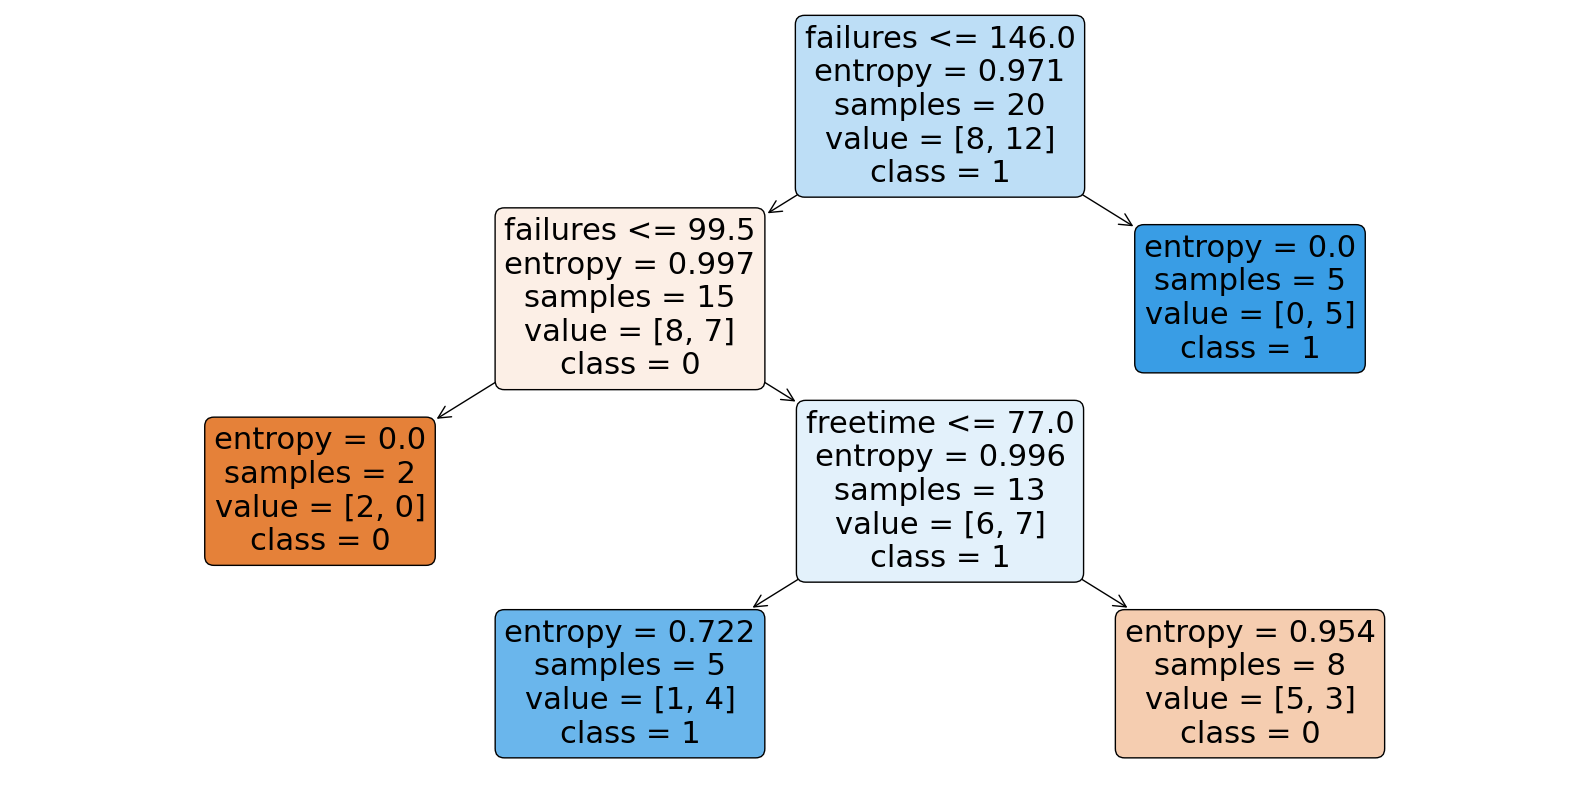

In [222]:
#Graficar
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, rounded=True, class_names=['0','1'], feature_names=X.columns)
plt.show()

#### Segunda de 3

In [140]:
Xtrain2 = pd.concat([c1, c3])
Xtest2 = c2
ytrain2 = pd.concat([y[0:10], y[20:30]])
ytest2 = y[10:20]

In [141]:
auxGlucose = pd.DataFrame()
auxGlucose['Glucose'] = Xtrain2.sort_values(by=['Glucose'])['Glucose']
auxGlucose['Target'] = ytrain2
auxGlucose.T

,6,1,3,27,21,7,5,29,23,25,9,20,4,24,28,26,0,2,22,8
Glucose,78,85,89,97,99,115,116,117,119,125,125,126,137,143,145,147,148,183,196,197
Target,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,1,1


##### condicional 1 arbol2


In [142]:
## <= 80 GLUCOSE

EnSI_arbol2 = -((1/1*math.log2(1/1)) )
EnNO_arbol2 = -((9/19*math.log2(9/19)) + (10/19*math.log2(10/19)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(1/20) + EnNO_arbol2*(19/20))

ENTROPIA LADO SI:  -0.0 
ENTROPIA LADO NO:  0.9980008838722996

ENTROPIA TOTAL:
 0.9481008396786845


In [143]:
## <= 87 GLUCOSE

EnSI_arbol2 = -((1/2*math.log2(1/2)) + (1/2*math.log2(1/2)))
EnNO_arbol2 = -((8/18*math.log2(8/18)) + (10/18*math.log2(10/18)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(2/20) + EnNO_arbol2*(18/20))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  0.9910760598382222

ENTROPIA TOTAL:
 0.9919684538544


In [144]:
## <= 92 GLUCOSE

EnSI_arbol2 = -((2/3*math.log2(2/3)) + (1/3*math.log2(1/3)))
EnNO_arbol2 = -((7/17*math.log2(7/17)) + (10/17*math.log2(10/17)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(3/20) + EnNO_arbol2*(17/20))

ENTROPIA LADO SI:  0.9182958340544896 
ENTROPIA LADO NO:  0.9774178175281716

ENTROPIA TOTAL:
 0.9685495200071192


In [145]:
## <= 100 GLUCOSE

EnSI_arbol2 = -((4/5*math.log2(4/5)) + (1/5*math.log2(1/5)))
EnNO_arbol2 = -((5/15*math.log2(5/15)) + (10/15*math.log2(10/15)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(5/20) + EnNO_arbol2*(15/20))

ENTROPIA LADO SI:  0.7219280948873623 
ENTROPIA LADO NO:  0.9182958340544896

ENTROPIA TOTAL:
 0.8692038992627078


In [146]:
## <= 118 GLUCOSE

EnSI_arbol2 = -((7/8*math.log2(7/8)) + (1/8*math.log2(1/8)))
EnNO_arbol2 = -((2/12*math.log2(2/12)) + (10/12*math.log2(10/12)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(8/20) + EnNO_arbol2*(12/20))

ENTROPIA LADO SI:  0.5435644431995964 
ENTROPIA LADO NO:  0.6500224216483541

ENTROPIA TOTAL:
 0.607439230268851


In [147]:
## <= 125.5 GLUCOSE

EnSI_arbol2 = -((7/11*math.log2(7/11)) + (4/11*math.log2(4/11)))
EnNO_arbol2 = -((2/9*math.log2(2/9)) + (7/9*math.log2(7/9)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(11/20) + EnNO_arbol2*(9/20))

ENTROPIA LADO SI:  0.9456603046006402 
ENTROPIA LADO NO:  0.7642045065086203

ENTROPIA TOTAL:
 0.8640051954592314


In [148]:
## <= 140 GLUCOSE

EnSI_arbol2 = -((8/13*math.log2(8/13)) + (5/13*math.log2(5/13)))
EnNO_arbol2 = -((1/7*math.log2(1/7)) + (6/7*math.log2(6/7)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(13/20) + EnNO_arbol2*(7/20))

ENTROPIA LADO SI:  0.961236604722876 
ENTROPIA LADO NO:  0.5916727785823275

ENTROPIA TOTAL:
 0.831889265573684


In [149]:
## <= 149 GLUCOSE

EnSI_arbol2 = -((9/17*math.log2(9/17)) + (8/17*math.log2(8/17)))
EnNO_arbol2 = -((3/3*math.log2(3/3)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(17/20) + EnNO_arbol2*(3/20))

ENTROPIA LADO SI:  0.9975025463691153 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.8478771644137479


In [150]:
## <= 190 GLUCOSE

EnSI_arbol2 = -((9/18*math.log2(9/18)) + (9/18*math.log2(9/18)))
EnNO_arbol2 = -((2/2*math.log2(2/2)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(18/20) + EnNO_arbol2*(2/20))

ENTROPIA LADO SI:  1.0 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.9


MEJOR ENTROPIA GLUCOSA <= 118 ---> 0.6

##### condicional 2 arbol2 izquierda

In [151]:
auxPregnancies = pd.DataFrame()
auxPregnancies['Glucose'] = Xtrain2[Xtrain2['Glucose']<= 118].sort_values(by=['Glucose'])['Glucose']
auxPregnancies['Target'] = ytrain2
auxPregnancies.T

,6,1,3,27,21,7,5,29
Glucose,78,85,89,97,99,115,116,117
Target,1,0,0,0,0,0,0,0


In [152]:
# glucose <= 81.5
EnSI_arbol2 = -((1/1*math.log2(1/1)))
EnNO_arbol2 = -( (7/7*math.log2(7/7)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(1/8) + EnNO_arbol2*(7/8))

ENTROPIA LADO SI:  -0.0 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 -0.0


##### condicional 2 arbol 2 derecha

In [153]:
auxPregnancies = pd.DataFrame()
auxPregnancies['Pregnancies'] = Xtrain2[Xtrain2['Glucose']>= 118].sort_values(by=['Pregnancies'])['Pregnancies']
auxPregnancies['Target'] = ytrain2
auxPregnancies.T

,4,8,20,0,22,26,2,9,23,25,24,28
Pregnancies,0,2,3,6,7,7,8,8,9,10,11,13
Target,1,1,0,1,1,1,1,1,1,1,1,0


In [154]:
# pregnancies <= 12
EnSI_arbol2 = -((1/11*math.log2(1/11))+ (10/11*math.log2(10/11)))
EnNO_arbol2 = -( (1/1*math.log2(1/1)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(11/12) + EnNO_arbol2*(1/12))

ENTROPIA LADO SI:  0.4394969869215134 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.4028722380113873


##### condicional 3 arbol2

In [155]:
auxPregnancies2 = pd.DataFrame()
auxPregnancies2['Pregnancies'] = Xtrain2[(Xtrain2['Glucose']>= 118) & (Xtrain2['Pregnancies']<= 12)].sort_values(by=['Pregnancies'])['Pregnancies']
auxPregnancies2['Target'] = ytrain2
auxPregnancies2.T

,4,8,20,0,22,26,2,9,23,25,24
Pregnancies,0,2,3,6,7,7,8,8,9,10,11
Target,1,1,0,1,1,1,1,1,1,1,1


In [156]:
EnSI_arbol2 = -((1/3*math.log2(1/3))+ (2/3*math.log2(2/3)))
EnNO_arbol2 = -( (8/8*math.log2(8/8)))
print('ENTROPIA LADO SI: ',EnSI_arbol2,"\nENTROPIA LADO NO: ", EnNO_arbol2)
print("\nENTROPIA TOTAL:\n",EnSI_arbol2*(3/11) + EnNO_arbol2*(8/11))

ENTROPIA LADO SI:  0.9182958340544896 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.2504443183784971


In [157]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(Xtrain2, ytrain2)
modelo.score(Xtest2, ytest2)

0.5

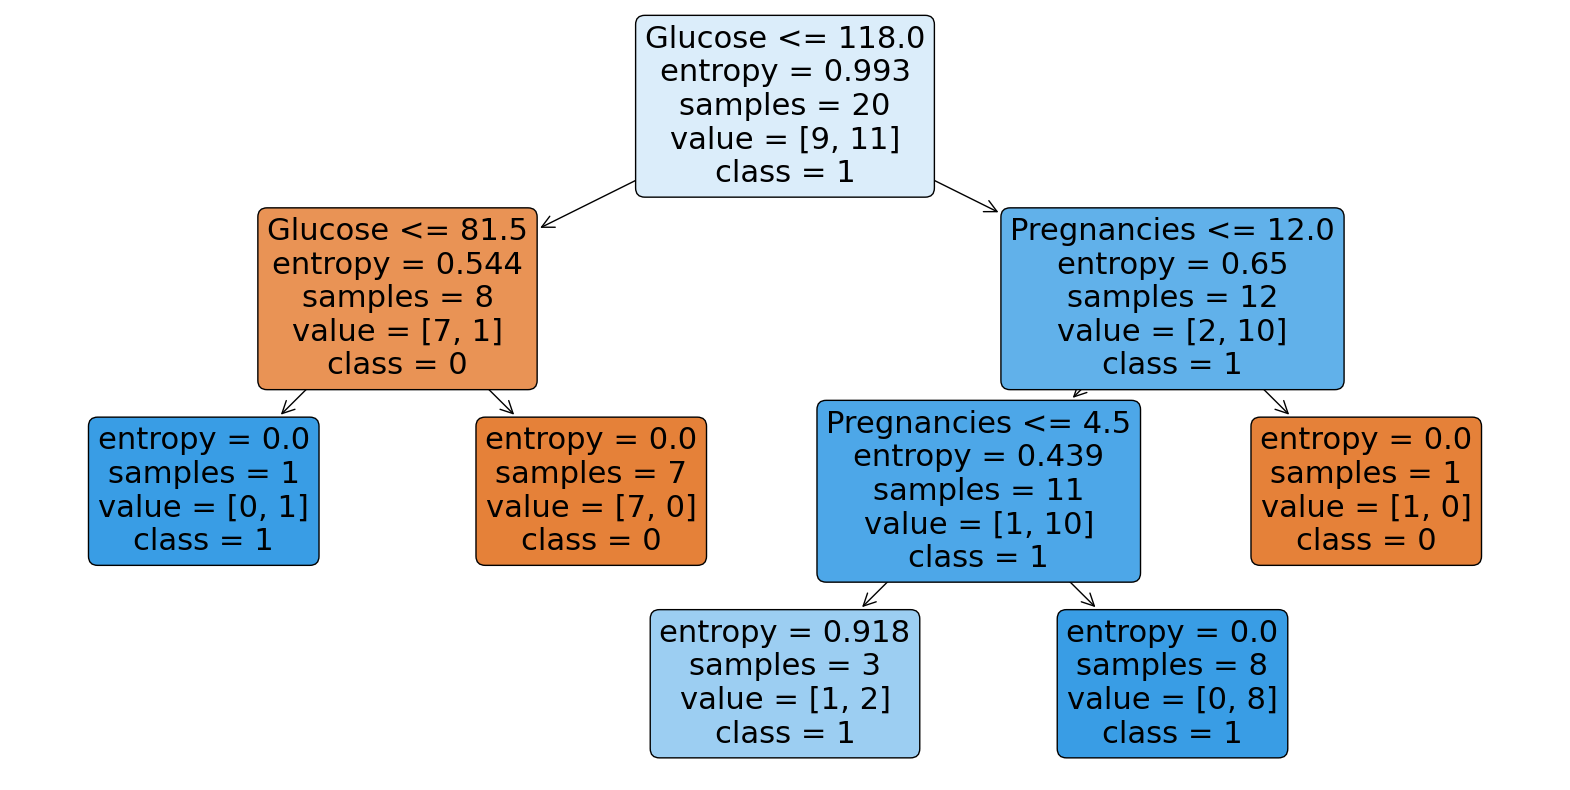

In [158]:
#Graficar
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, rounded=True, class_names=['0','1'], feature_names=X.columns)
plt.show()

#### Tercera de 3

In [159]:
Xtrain3 = pd.concat([c2, c3])
Xtest3 = c1
ytrain3 = pd.concat([y[10:20], y[20:30]])
ytest3 = y[0:10]


In [160]:
auxGlucose = pd.DataFrame()
auxGlucose['Glucose'] = Xtrain3.sort_values(by=['Glucose'])['Glucose']
auxGlucose['Target'] = ytrain3
auxGlucose.T

,27,21,15,18,17,10,19,29,16,23,25,20,12,24,28,26,14,11,13,22
Glucose,97,99,100,103,107,110,115,117,118,119,125,126,139,143,145,147,166,168,189,196
Target,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1


##### condicion 1 arbol 3

In [161]:
## <= 146 GLUCOSE

EnSI_arbol3 = -((8/15*math.log2(8/15)) + (7/15*math.log2(7/15)))
EnNO_arbol3 = -((5/5*math.log2(5/5)))
print('ENTROPIA LADO SI: ',EnSI_arbol3,"\nENTROPIA LADO NO: ", EnNO_arbol3)
print("\nENTROPIA TOTAL:\n",EnSI_arbol3*(15/20) + EnNO_arbol3*(5/20))

ENTROPIA LADO SI:  0.9967916319816366 
ENTROPIA LADO NO:  -0.0

ENTROPIA TOTAL:
 0.7475937239862274


##### condicion 2 arbol3

In [162]:
auxPregnancies = pd.DataFrame()
auxPregnancies['Glucose'] = Xtrain3[Xtrain3['Glucose']<= 146].sort_values(by=['Glucose'])['Glucose']
auxPregnancies['Target'] = ytrain3
auxPregnancies.T

,27,21,15,18,17,10,19,29,16,23,25,20,12,24,28
Glucose,97,99,100,103,107,110,115,117,118,119,125,126,139,143,145
Target,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0


In [163]:
## <= 99.5 GLUCOSE

EnSI_arbol3 = -((2/2*math.log2(2/2)))
EnNO_arbol3 = -((6/13*math.log2(6/13)) + (7/13*math.log2(7/13)))
print('ENTROPIA LADO SI: ',EnSI_arbol3,"\nENTROPIA LADO NO: ", EnNO_arbol3)
print("\nENTROPIA TOTAL:\n",EnSI_arbol3*(2/15) + EnNO_arbol3*(13/15))

ENTROPIA LADO SI:  -0.0 
ENTROPIA LADO NO:  0.9957274520849256

ENTROPIA TOTAL:
 0.8629637918069356


##### condicional 3 arbol 3

In [164]:
auxPregnancies2 = pd.DataFrame()
auxPregnancies2['BloodPressure'] = Xtrain3[(Xtrain3['Glucose']<=146) & (Xtrain3['Glucose']>= 99.5)].sort_values(by=['BloodPressure'])['BloodPressure']
auxPregnancies2['Target'] = ytrain3
auxPregnancies2.T

,15,18,19,25,17,12,23,28,16,20,10,29,24
BloodPressure,0,30,70,70,74,80,80,82,84,88,92,92,94
Target,1,0,1,1,1,0,1,0,1,0,0,0,1


In [165]:
## <= 77 blood pressure

EnSI_arbol3 = -((1/5*math.log2(1/5)) + (4/5*math.log2(4/5)))
EnNO_arbol3 = -((5/8*math.log2(5/8)) + (3/8*math.log2(3/8)))
print('ENTROPIA LADO SI: ',EnSI_arbol3,"\nENTROPIA LADO NO: ", EnNO_arbol3)
print("\nENTROPIA TOTAL:\n",EnSI_arbol3*(5/13) + EnNO_arbol3*(8/13))

ENTROPIA LADO SI:  0.7219280948873623 
ENTROPIA LADO NO:  0.954434002924965

ENTROPIA TOTAL:
 0.8650086536797332


In [166]:
modelo = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(Xtrain3, ytrain3)
modelo.score(Xtest3, ytest3)

0.6

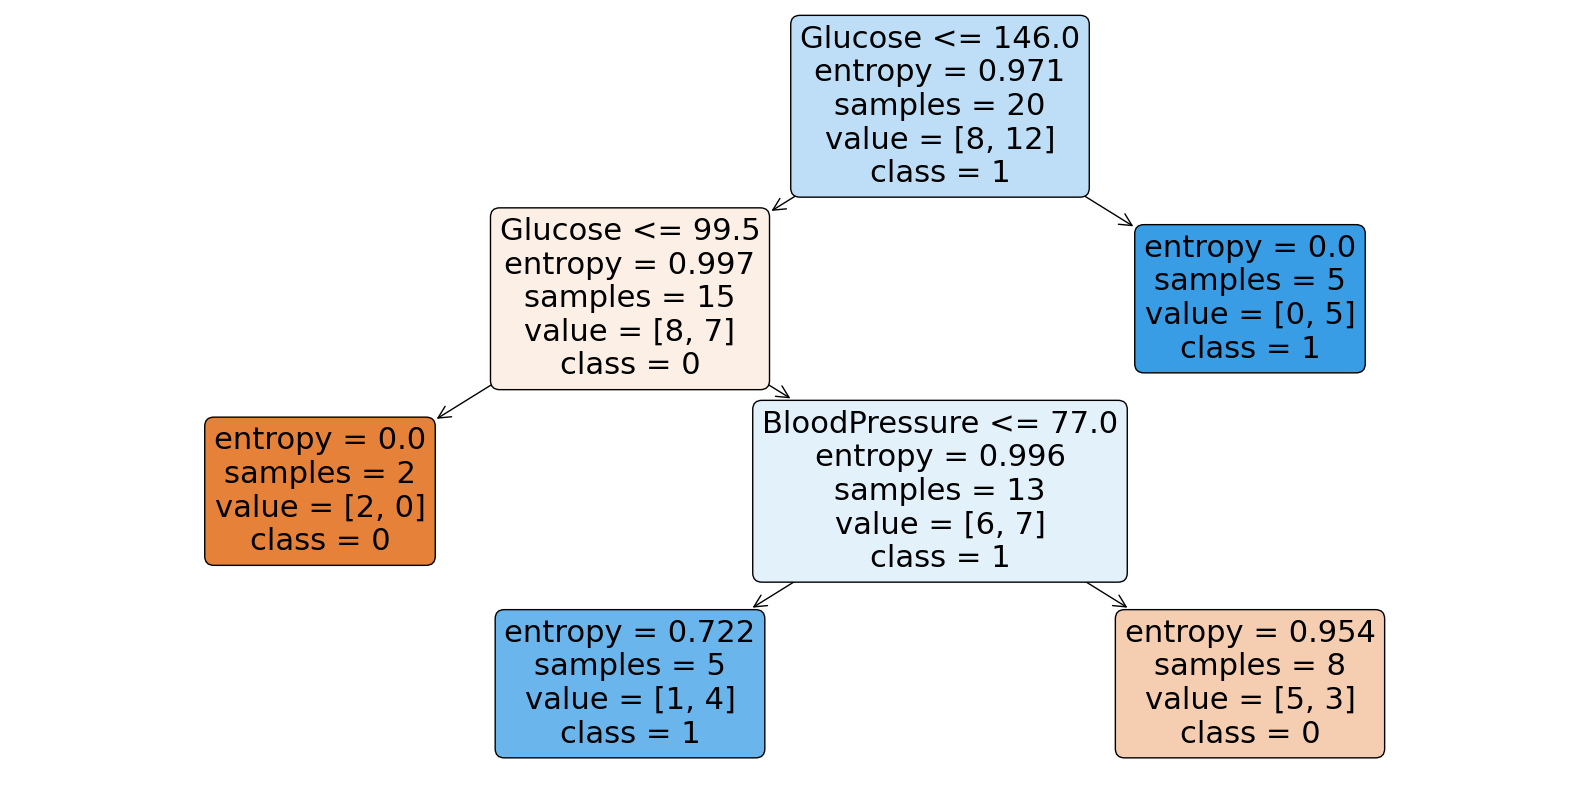

In [167]:
#Graficar
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, rounded=True, class_names=['0','1'], feature_names=X.columns)
plt.show()

## B) **Corroborar los resultados usando Sklearn**

In [168]:
modeloArbol = DecisionTreeClassifier(max_depth=3,criterion='entropy')
modeloArbol.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [169]:

validacion_cruzada = cross_validate(modeloArbol,
                   X,y, cv=3, 
                   return_estimator=True, 
                   scoring='accuracy',
                   return_train_score=True)

In [170]:
validacion_cruzada

{'fit_time': array([0.00406241, 0.00299287, 0.00516057]),
 'score_time': array([0.00103092, 0.00354099, 0.0015049 ]),
 'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3)],
 'test_score': array([0.6, 0.5, 0.5]),
 'train_score': array([0.8 , 0.95, 0.8 ])}

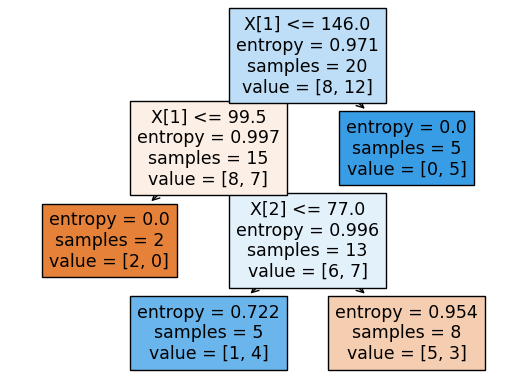

In [171]:
plot_tree(validacion_cruzada['estimator'][0],filled=True)
plt.show()

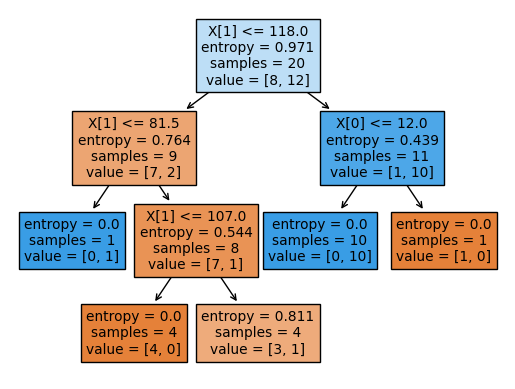

In [172]:
plot_tree(validacion_cruzada['estimator'][1],filled=True)
plt.show()

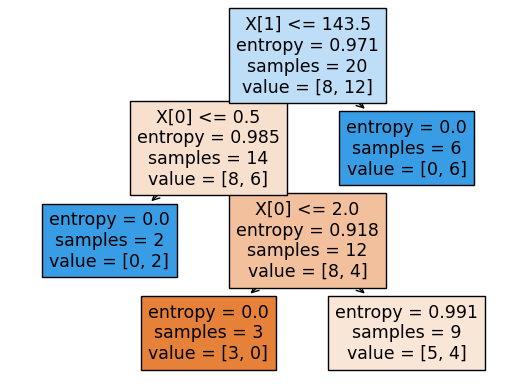

In [173]:
plot_tree(validacion_cruzada['estimator'][2],filled=True)
plt.show()

In [174]:
validacion_cruzada['train_score'].mean()

0.85

In [175]:
validacion_cruzada['test_score'].mean()

0.5333333333333333

**Dibujar la frontera de decisión a mano o en el notebook para el árbol de la primera cv.(No se pueden usar bibliotecas que realizan automáticamente este proceso**

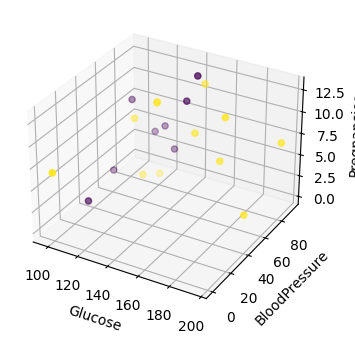

In [176]:
#dibujar datos en 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtrain3['Glucose'], Xtrain3['BloodPressure'], Xtrain3['Pregnancies'], c=ytrain3, cmap='viridis')
ax.set_xlabel('Glucose')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Pregnancies')
plt.show()


<url>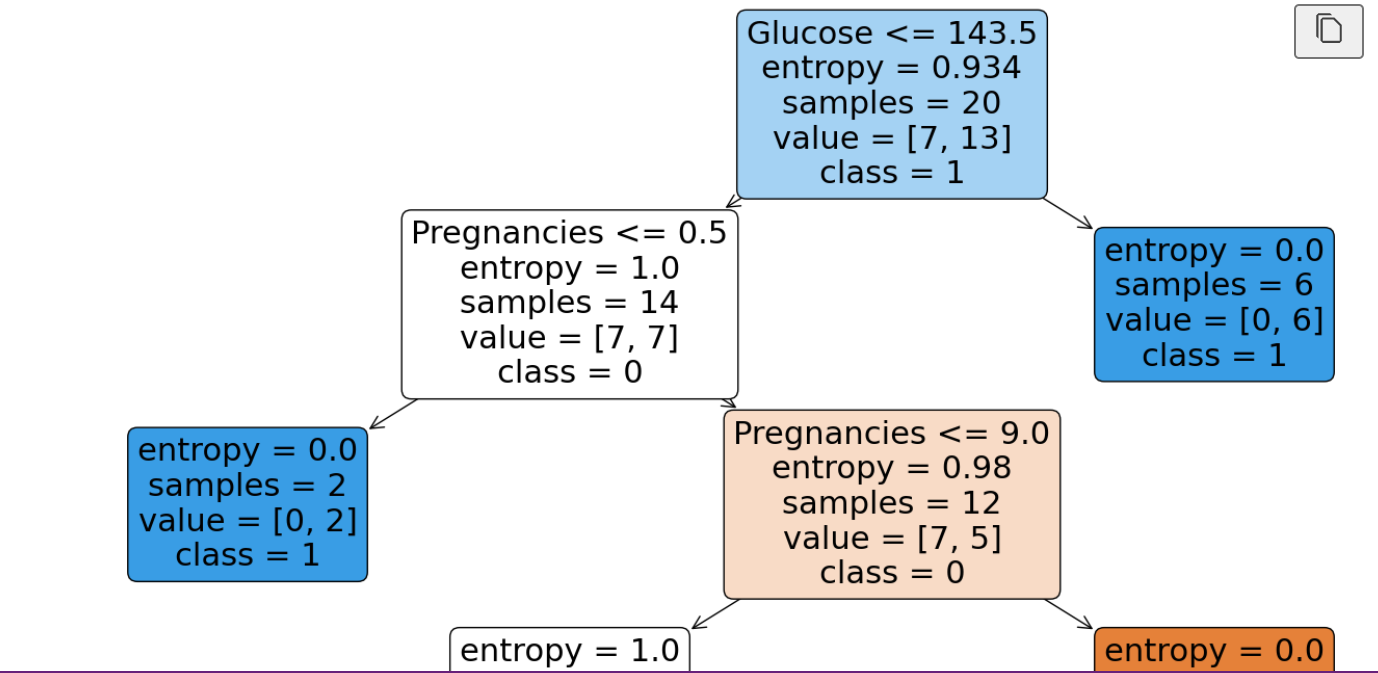

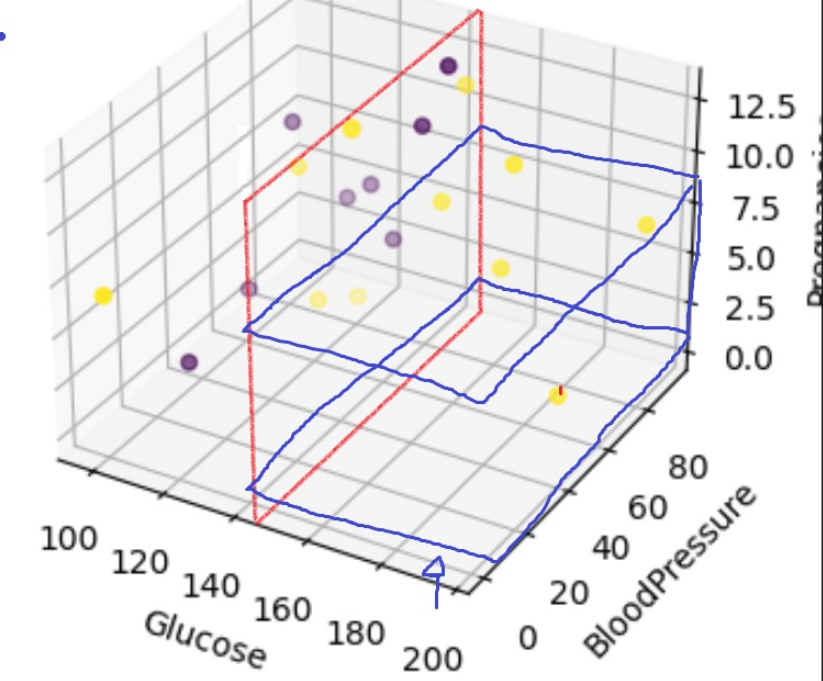

<h1> SE ANEXA VIDEO DE MUESTRA EN 3D VISUALMENTE CADA HIPERPLANO Y CADA GRAFICO, EN LA MISMA ENTREGA DE ESTE CUADERNO

## COMPROBACION SKLEARN KNN


In [177]:
modeloVecino = KNeighborsClassifier(n_neighbors=3)

In [178]:
escalado = MinMaxScaler()

In [179]:
df_scaled = escalado.fit_transform(X)

In [180]:
df_scaled

array([[0.46153846, 0.58823529, 0.75      ],
       [0.07692308, 0.05882353, 0.6875    ],
       [0.61538462, 0.88235294, 0.66666667],
       [0.07692308, 0.09243697, 0.6875    ],
       [0.        , 0.49579832, 0.41666667],
       [0.38461538, 0.31932773, 0.77083333],
       [0.23076923, 0.        , 0.52083333],
       [0.76923077, 0.31092437, 0.        ],
       [0.15384615, 1.        , 0.72916667],
       [0.61538462, 0.39495798, 1.        ],
       [0.30769231, 0.26890756, 0.95833333],
       [0.76923077, 0.75630252, 0.77083333],
       [0.76923077, 0.51260504, 0.83333333],
       [0.07692308, 0.93277311, 0.625     ],
       [0.38461538, 0.7394958 , 0.75      ],
       [0.53846154, 0.18487395, 0.        ],
       [0.        , 0.33613445, 0.875     ],
       [0.53846154, 0.24369748, 0.77083333],
       [0.07692308, 0.21008403, 0.3125    ],
       [0.07692308, 0.31092437, 0.72916667],
       [0.23076923, 0.40336134, 0.91666667],
       [0.61538462, 0.17647059, 0.875     ],
       [0.

In [181]:
modeloVecino.fit(df_scaled,y)

KNeighborsClassifier(n_neighbors=3)

In [182]:
modeloVecino.predict([[8,150,80]])

array([1], dtype=int64)

In [183]:
p = np.array([5,150,80])

In [184]:
p_scaled = escalado.transform([p])
p_scaled


c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.38461538, 0.60504202, 0.83333333]])

In [185]:
# se realiza la distancia euclidiana
distancias = np.sqrt(np.sum((p_scaled-df_scaled)**2, axis=1))
distancias

array([0.11464759, 0.64365872, 0.39740856, 0.61539081, 0.57747233,
       0.29247035, 0.69814091, 0.9637835 , 0.4691449 , 0.35379022,
       0.36678131, 0.41798922, 0.39556743, 0.49546443, 0.15818427,
       0.94586166, 0.4711437 , 0.39767419, 0.72244981, 0.43821278,
       0.26699846, 0.48853252, 0.42888671, 0.40315877, 0.48759135,
       0.45046086, 0.16137007, 0.56062788, 0.61716907, 0.30418144])

In [186]:
#elegir los 3 vecinos mas cercanos
k = 3
vecinos = np.argsort(distancias)[:k]
vecinos

array([ 0, 14, 26], dtype=int64)

In [187]:
modeloVecino.predict_proba([p])

array([[0., 1.]])

In [188]:
df[['Pregnancies','Glucose','BloodPressure','Outcome']]

,Pregnancies,Glucose,BloodPressure,Outcome
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1
5,5,116,74,0
6,3,78,50,1
7,10,115,0,0
8,2,197,70,1
9,8,125,96,1


los 3 vecinos mas cercanos estan en la posicion 0,14,26 del dataset. En la posicion 0 dice que el outcome es igual a 1 , en la 14 --> 1 y en la 26 --> 1

## validacion cruzada manual


In [189]:
c1 = X[0:10]
c2 = X[10:20]
c3 = X[20:30]

In [190]:
c1

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
5,5,116,74
6,3,78,50
7,10,115,0
8,2,197,70
9,8,125,96


In [191]:
Xtrain1 = pd.concat([c1, c2])
Xtest1 = c3
ytrain1 = pd.concat([y[0:10], y[10:20]])
ytest1 = y[20:30]
# reescribir indices de xtrain2 y ytrain2
Xtrain1.index = range(0,20)
ytrain1.index = range(0,20)
# reescribir indices de xtest2 y ytest2
Xtest1.index = range(0,10)
ytest1.index = range(0,10)



Xtrain2 = pd.concat([c1, c3])
Xtest2 = c2
ytrain2 = pd.concat([y[0:10], y[20:30]])
ytest2 = y[10:20]
# reescribir indices de xtrain2 y ytrain2
Xtrain2.index = range(0,20)
ytrain2.index = range(0,20)
# reescribir indices de xtest2 y ytest2
Xtest2.index = range(0,10)
ytest2.index = range(0,10)


Xtrain3 = pd.concat([c2, c3])
Xtest3 = c1
ytrain3 = pd.concat([y[10:20], y[20:30]])
ytest3 = y[0:10]

Xtrain3.index = range(0,20)
ytrain3.index = range(0,20)
# reescribir indices de xtest2 y ytest2
Xtest3.index = range(0,10)
ytest3.index = range(0,10)

In [192]:
cv1_scaled = escalado.fit_transform(Xtrain1)
cv2_scaled = escalado.fit_transform(Xtrain2)
cv3_scaled = escalado.fit_transform(Xtrain3)
cv1_scaled_test = escalado.transform(Xtest1)
cv2_scaled_test = escalado.transform(Xtest2)
cv3_scaled_test = escalado.transform(Xtest3)


## primer cv

In [193]:
cv1_scaled_test

array([[0.23076923, 0.29292929, 0.93617021],
       [0.61538462, 0.02020202, 0.89361702],
       [0.53846154, 1.        , 0.95744681],
       [0.69230769, 0.22222222, 0.85106383],
       [0.84615385, 0.46464646, 1.        ],
       [0.76923077, 0.28282828, 0.74468085],
       [0.53846154, 0.50505051, 0.80851064],
       [0.07692308, 0.        , 0.70212766],
       [1.        , 0.48484848, 0.87234043],
       [0.38461538, 0.2020202 , 0.9787234 ]])

In [194]:
for i in range(len(cv1_scaled_test)):
    distancias = np.sqrt(np.sum((cv1_scaled_test[i]-cv1_scaled)**2, axis=1))
    k = 3
    vecinos = np.argsort(distancias)[:k]
    print("\n\nvecino mas cercano: ",vecinos)
    print("distancia: ",distancias[vecinos])
    print("clase vecinos: ",ytrain1[vecinos])
    print("clase real: ",ytest1[i])


      
     # calcular el porcentaje de la clase
    ceros = np.count_nonzero(ytrain1[vecinos].values == 0)
    unos = np.count_nonzero(ytrain1[vecinos].values == 1)
    if ceros >= unos:
        print("clase predicha: 0")

    else:
        print("clase predicha: 1")
  




vecino mas cercano:  [10 16 19]
distancia:  [0.17235806 0.24261681 0.24550943]
clase vecinos:  10    0
16    1
19    1
Name: Outcome, dtype: int64
clase real:  0
clase predicha: 1


vecino mas cercano:  [17 10  5]
distancia:  [0.26867418 0.33531057 0.34331565]
clase vecinos:  17    1
10    0
5     0
Name: Outcome, dtype: int64
clase real:  0
clase predicha: 0


vecino mas cercano:  [14  8  2]
distancia:  [0.33522516 0.40824997 0.40840701]
clase vecinos:  14    1
8     1
2     1
Name: Outcome, dtype: int64
clase real:  1
clase predicha: 1


vecino mas cercano:  [17  5  9]
distancia:  [0.08341038 0.22988837 0.25222462]
clase vecinos:  17    1
5     0
9     1
Name: Outcome, dtype: int64
clase real:  1
clase predicha: 1


vecino mas cercano:  [ 9 12 17]
distancia:  [0.08358625 0.23183279 0.35028098]
clase vecinos:  9     1
12    0
17    1
Name: Outcome, dtype: int64
clase real:  1
clase predicha: 1


vecino mas cercano:  [17  5  9]
distancia:  [0.08371423 0.27294939 0.2805489 ]
clase vec

## segundo cv

In [195]:
cv2_scaled_test

array([[0.30769231, 0.13131313, 0.9787234 ],
       [0.76923077, 0.71717172, 0.78723404],
       [0.76923077, 0.42424242, 0.85106383],
       [0.07692308, 0.92929293, 0.63829787],
       [0.38461538, 0.6969697 , 0.76595745],
       [0.53846154, 0.03030303, 0.        ],
       [0.        , 0.21212121, 0.89361702],
       [0.53846154, 0.1010101 , 0.78723404],
       [0.07692308, 0.06060606, 0.31914894],
       [0.07692308, 0.18181818, 0.74468085]])

In [196]:
for i in range(len(cv2_scaled_test)):
    distancias = np.sqrt(np.sum((cv2_scaled_test[i]-cv2_scaled)**2, axis=1))
    k = 3
    vecinos = np.argsort(distancias)[:k]
    print("\n\nvecino mas cercano: ",vecinos)
    print("distancia: ",distancias[vecinos])
    print("clase vecinos: ",ytrain2[vecinos]) 
    print("clase real: ",ytest2[i]) 
    

      
     # calcular el porcentaje de la clase
    ceros = np.count_nonzero(ytrain2[vecinos].values == 0)
    unos = np.count_nonzero(ytrain2[vecinos].values == 1)
    if ceros >= unos:
        print("clase Predicha: 0")
    else:
        print("clase Predicha: 1")
    



vecino mas cercano:  [19 10  5]
distancia:  [0.21192671 0.28944504 0.29066292]
clase vecinos:  19    0
10    0
5     0
Name: Outcome, dtype: int64
clase real:  0
clase Predicha: 0


vecino mas cercano:  [ 2 14 16]
distancia:  [0.25591008 0.26829144 0.26858202]
clase vecinos:  2     1
14    1
16    1
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 1


vecino mas cercano:  [13 15 14]
distancia:  [0.11218001 0.12536545 0.19288768]
clase vecinos:  13    1
15    1
14    1
Name: Outcome, dtype: int64
clase real:  0
clase Predicha: 1


vecino mas cercano:  [8 4 0]
distancia:  [0.13846945 0.49290479 0.52604816]
clase vecinos:  8    1
4    1
0    1
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 1


vecino mas cercano:  [ 0 16  2]
distancia:  [0.13414533 0.19506629 0.31221794]
clase vecinos:  0     1
16    1
2     1
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 1


vecino mas cercano:  [7 6 4]
distancia:  [0.36332186 0.60568985 0.8247653 ]
clase vecinos:  7 

## tercer cv

In [197]:
cv3_scaled_test

array([[ 0.46153846,  0.51515152,  0.76595745],
       [ 0.07692308, -0.12121212,  0.70212766],
       [ 0.61538462,  0.86868687,  0.68085106],
       [ 0.07692308, -0.08080808,  0.70212766],
       [ 0.        ,  0.4040404 ,  0.42553191],
       [ 0.38461538,  0.19191919,  0.78723404],
       [ 0.23076923, -0.19191919,  0.53191489],
       [ 0.76923077,  0.18181818,  0.        ],
       [ 0.15384615,  1.01010101,  0.74468085],
       [ 0.61538462,  0.28282828,  1.0212766 ]])

In [198]:
for i in range(len(cv3_scaled_test)):
    distancias = np.sqrt(np.sum((cv3_scaled_test[i]-cv3_scaled)**2, axis=1))
    k = 3
    vecinos = np.argsort(distancias)[:k]
    print("\n\nvecino mas cercano: ",vecinos)
    print("distancia: ",distancias[vecinos])
    print("clase Vecinos: ",ytrain3[vecinos]) 
    print("clase real: ",ytest3[i]) 
    

      
     # calcular el porcentaje de la clase
    ceros = np.count_nonzero(ytrain3[vecinos].values == 0)
    unos = np.count_nonzero(ytrain3[vecinos].values == 1)
    if ceros >= unos:
        print("clase Predicha: 0")
    else:
        print("clase Predicha: 1")
    



vecino mas cercano:  [16  4  2]
distancia:  [0.08848709 0.1974209  0.33193691]
clase Vecinos:  16    1
4     1
2     0
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 1


vecino mas cercano:  [17  9  6]
distancia:  [0.12121212 0.30600349 0.39204138]
clase Vecinos:  17    0
9     1
6     1
Name: Outcome, dtype: int64
clase real:  0
clase Predicha: 1


vecino mas cercano:  [ 1  4 12]
distancia:  [0.24071315 0.29997387 0.31569844]
clase Vecinos:  1     1
4     1
12    1
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 1


vecino mas cercano:  [17  9  6]
distancia:  [0.08080808 0.26605136 0.35831956]
clase Vecinos:  17    0
9     1
6     1
Name: Outcome, dtype: int64
clase real:  0
clase Predicha: 1


vecino mas cercano:  [ 8  9 17]
distancia:  [0.36767057 0.39642896 0.49565211]
clase Vecinos:  8     0
9     1
17    0
Name: Outcome, dtype: int64
clase real:  1
clase Predicha: 0


vecino mas cercano:  [ 7 19  0]
distancia:  [0.17869835 0.19175559 0.21507773]
clase Vec

In [199]:
validacion_cruzadaknn = cross_validate(KNeighborsClassifier(n_neighbors=3),
                   X,y, cv=3, 
                   return_estimator=True, 
                   scoring='accuracy',
                   return_train_score=True)

In [200]:
validacion_cruzadaknn

{'fit_time': array([0.00411201, 0.00315547, 0.00299168]),
 'score_time': array([0.0041666 , 0.0049212 , 0.00332212]),
 'estimator': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3)],
 'test_score': array([0.6, 0.5, 0.6]),
 'train_score': array([0.75, 0.75, 0.6 ])}

In [201]:
validacion_cruzadaknn['train_score'].mean()

0.7000000000000001

In [202]:
validacion_cruzadaknn['test_score'].mean()

0.5666666666666668

# SEGUNDO PUNTO PARCIAL

In [203]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
import pandas as pd

In [204]:
df2 = pd.read_csv('https://raw.githubusercontent.com/DanielOlarte-GitHub/DataSetsFamosos/main/school_grades_dataset.csv')

In [205]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [207]:
df2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


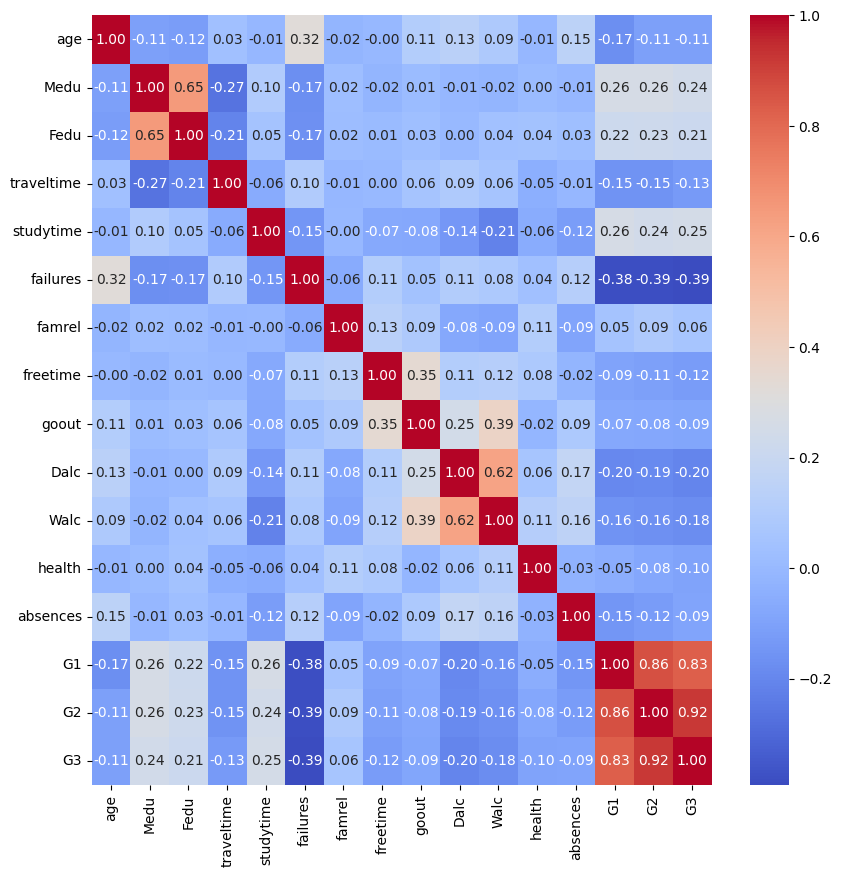

In [208]:
# graficar matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [209]:
Caracteristicas = ['age',   'failures', 'freetime', 'goout',  'absences','studytime','health' ,'G3']


In [210]:
X = df2[Caracteristicas].drop(['G3'], axis=1)
y = df2['G3']

In [211]:
X.head()

,age,failures,freetime,goout,absences,studytime,health
0,18,0,3,4,4,2,3
1,17,0,3,3,2,2,3
2,15,0,3,2,6,2,3
3,15,0,2,2,0,3,5
4,16,0,3,2,0,2,5


In [212]:
df2['failures'].unique()

array([0, 3, 1, 2], dtype=int64)

In [213]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [214]:
tree_model = DecisionTreeRegressor()
tree_scores = cross_validate(tree_model, X, y, cv=5,scoring='neg_root_mean_squared_error')

In [215]:
# 1 
X.shape

(649, 7)

In [216]:
tree_scores

{'fit_time': array([0.0037148 , 0.00388002, 0.00379467, 0.00448418, 0.00300956]),
 'score_time': array([0.00264835, 0.00099921, 0.00163698, 0.00277233, 0.00099778]),
 'test_score': array([-3.64849811, -3.59861084, -4.26366581, -3.87598898, -4.83074866])}

In [217]:
from math import sqrt
print("Árbol de decisión: promedio de score de validación cruzada = ", -tree_scores['test_score'].mean())


Árbol de decisión: promedio de score de validación cruzada =  4.043502482269822


In [218]:
y.unique()

array([11, 12, 14, 13, 17, 15,  7, 10, 16,  9,  8, 18,  6,  0,  1,  5, 19],
      dtype=int64)

In [219]:
knn_model = KNeighborsRegressor()
knn_scores = cross_validate(knn_model, X, y, cv=5)

In [220]:
print("Árbol de decisión: promedio de score de validación cruzada = ", -knn_scores['test_score'].mean())

Árbol de decisión: promedio de score de validación cruzada =  0.13782103382530198


CONCLUSION: 

La validación cruzada es una técnica fundamental en el aprendizaje automático que nos permite evaluar el rendimiento de nuestros modelos de manera robusta y confiable.

Los árboles de decisión son un método de aprendizaje automático eficaz y fácilmente interpretable para clasificación y regresión, y son especialmente útiles para datos con una estructura jerárquica.

KNN es un método de aprendizaje automático simple pero efectivo que se utiliza para clasificación y regresión y es especialmente adecuado para conjuntos de datos pequeños.

La escala de características es una técnica importante en el aprendizaje automático que nos permite comparar características que se miden en diferentes escalas y evitar que las características con valores más grandes dominen las características con valores más pequeños.

El procesamiento de datos es una etapa crítica en cualquier proyecto de aprendizaje automático, y es importante limpiar, normalizar y transformar los datos antes de entrenar cualquier modelo.

La visualización de datos es una herramienta útil para comprender los patrones y relaciones en los datos y puede ayudarnos a tomar decisiones informadas sobre la selección de características y la creación de modelos.


